# Regression
Regression is a statistical method used in finance, investing, and other disciplines that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables). 
The two basic types of regression are simple linear regression and multiple linear regression, although there are non-linear regression methods for more complicated data and analysis. Simple linear regression uses one independent variable to explain or predict the outcome of the dependent variable Y, while multiple linear regression uses two or more independent variables to predict the outcome. 
#### The Dataset used in this analysis can be found in the repository

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('gm_2008_region.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


#### Creating array X for the 'fertility' feature and array y for the 'life' target variable.

In [5]:
y = df['life'].values
X = df['fertility'].values

#### Printing the dimensions of X and y before reshaping

In [6]:
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)


#### Reshaping X and y

In [7]:
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

#### Printing the dimensions of X and y after reshaping

In [8]:
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


## Basics of Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#### Creating training and test sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#### Creating the regressor: reg_all

In [14]:
reg_all = LinearRegression()

#### Fitting the regressor to the training data

In [15]:
reg_all.fit(X_train, y_train)

LinearRegression()

#### Predicting on the test data: y_pred

In [16]:
y_pred = reg_all.predict(X_test)

#### Computing and printing R^2 and RMSE

In [17]:
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907498
Root Mean Squared Error: 4.194027914110239


## Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score

#### Creating a linear regression object: reg

In [19]:
reg = LinearRegression()

#### Computing 5-fold cross-validation scores: cv_scores

In [21]:
cv_scores = cross_val_score(reg, X, y, cv=5)
print(cv_scores)

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]


#### Printing the average 5-fold cross-validation score

In [22]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.6168819644425119


#### Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes.
Performing 3-fold CV

In [23]:
cvscores_3 = cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

0.6294715754653507


Perform 10-fold CV

In [24]:
cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))

0.5883937741571185


## Regularized Regression

In [25]:
from sklearn.linear_model import Lasso

#### Instantiating a lasso regressor: lasso

In [26]:
lasso = Lasso(alpha=0.4, normalize=True)

#### Fitting the regressor to the data

In [27]:
lasso.fit(X, y)

Lasso(alpha=0.4, normalize=True)

#### Computing and printing the coefficients

In [28]:
lasso_coef = lasso.coef_
print(lasso_coef)

[-1.51388042]


## Regularization II: Ridge

In [32]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [33]:
from sklearn.linear_model import Ridge

#### Setting up the array of alphas and lists to store scores

In [34]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

#### Creating a ridge regressor: ridge

In [35]:
ridge = Ridge(normalize=True)

#### Computing the scores over range of alphas, specify the alpha value to use: ridge.alpha, performing 10-fold CV: ridge_cv_scores, appending the mean of ridge_cv_scores to ridge_scores, and appending the std of ridge_cv_scores to ridge_scores_std.

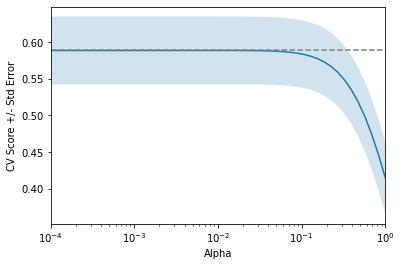

In [36]:
for alpha in alpha_space:
    ridge.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))
display_plot(ridge_scores, ridge_scores_std)